In [431]:
import pandas as pd 
import numpy as np
from datetime import timedelta
from datetime import date as dt
import seaborn as sns
engagement = pd.read_csv('takehome_user_engagement.csv')

In [410]:
users = pd.read_csv('takehome_users.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe6 in position 11: invalid continuation byte

In [411]:
file = 'takehome_users.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7294372453287324, 'language': ''}

In [412]:
users = pd.read_csv(file,encoding='ISO-8859-1')

In [413]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [414]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [415]:
engagement.visited.nunique()

1

In [416]:
#let's see if user id is the same thing in both dataframes
print(engagement.user_id.max(), users.invited_by_user_id.max(), users.object_id.max())

12000 11999.0 12000


so with those numbers, probably. The prompt is: Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

The first thing I can think of though is just from looking at the data id that there are SO many things that would be better predictors that we don't have, but first order of business is grouping user_id into "adopted" or not, then comparing that with object id in the users dataframe and compare that with non-adopted users. If there isn't a real difference then more data collection would be necessary.

In [417]:
engagement['time_stamp'] = pd.to_datetime(engagement.time_stamp)

In [418]:

#create a list of which users are considered 'adopted' or not by the aforementioned criteria
engagement['time_stamp'] = engagement['time_stamp'].dt.floor('d').astype(np.int64)
engagement = engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()
a = engagement.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
c = b[b < 8].index.get_level_values('user_id').tolist() 

In [419]:
user_adopted = []
for x in c:
    if x not in user_adopted:
        user_adopted.append(x)

In [420]:
users['adopted'] = 0

In [421]:
users.loc[users.object_id.isin(user_adopted), 'adopted'] = 1

In [422]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [423]:
users['last_session_creation_time']= users['last_session_creation_time'].fillna(pd.Timestamp.today) 
users['invited_by_user_id']= users['invited_by_user_id'].fillna(0) 
users = users.drop(['name', 'email'], axis=1)

In [ ]:
from plotly import __version__
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [424]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   last_session_creation_time  12000 non-null  object 
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          12000 non-null  float64
 8   adopted                     12000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 843.9+ KB


In [426]:
#users['creation_time']= pd.to_datetime(users['creation_time'])
#users['invited_by_user_id']= [int(x) for x in users['invited_by_user_id']]

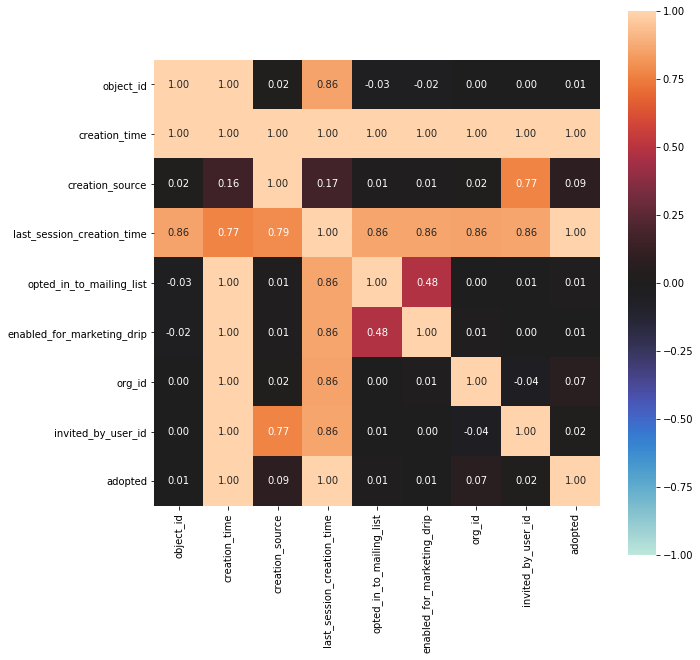

{'corr':                             object_id  creation_time  creation_source  \
 object_id                    1.000000       0.999843         0.016312   
 creation_time                0.999843       1.000000         0.999774   
 creation_source              0.016312       0.163460         1.000000   
 last_session_creation_time   0.857436       0.772674         0.791672   
 opted_in_to_mailing_list    -0.032370       0.999889         0.009854   
 enabled_for_marketing_drip  -0.022040       0.999836         0.008954   
 org_id                       0.004110       0.999716         0.022037   
 invited_by_user_id           0.001657       0.999799         0.768800   
 adopted                      0.005292       0.999825         0.087106   
 
                             last_session_creation_time  \
 object_id                                     0.857436   
 creation_time                                 0.999936   
 creation_source                               0.167506   
 last_session_

In [429]:
nominal.associations(users, theil_u=True, figsize=(10, 10))

At this point in time, it seems clear that there is something in user adoption from the user engagement data that seems to be correlating each other in 100% correlation ways, which points to either a defect in the data collection of login times, creation time, or my code in determining adoption in the first place. More exploratory data anlysis work needs to be done to determine the cause. if there is nothing wrong for some reason, then it is obvious to see that creation time has the highest correlation and therefore most predictive power.